## **Create Positional Embedding from Numpy as Pytorch**
* Suppose with have max sequence length and embedd_dim 
$$\text{max sequence length:  Maximum of token in each sentences } $$
$$\text{embedd dim :  Number of dimentions you want with each token after embedidng} $$



### **Create Positional Embedding in Numpy**

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

def plot_positional_encoding(pe_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(pe_matrix[:, :], cmap='coolwarm', xticklabels=5, yticklabels=50)
    plt.xlabel('Embedding Dimension')
    plt.ylabel('Position')
    plt.title('Positional Encoding Heatmap')
    plt.savefig('positional_outcom.png', dpi=300, bbox_inches='tight')
    plt.show()
    
max_len = 10
embedd_dim = 8

##### Cretate position 

In [2]:
pe = np.zeros((max_len, embedd_dim), dtype= np.float32 )
position = np.arange(0, max_len, dtype=np.float32).reshape(max_len,-1)
print(position)
print(pe)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]
 [9.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


##### Create even position and calculate term div sin position and term div cos position 

In [3]:
even_postion =  np.arange(0, embedd_dim, 2)
even_postion = np.tile(even_postion, (max_len, 1))
print(even_postion)

[[0 2 4 6]
 [0 2 4 6]
 [0 2 4 6]
 [0 2 4 6]
 [0 2 4 6]
 [0 2 4 6]
 [0 2 4 6]
 [0 2 4 6]
 [0 2 4 6]
 [0 2 4 6]]


In [4]:
odd_position =  np.arange(1, embedd_dim, 2)
odd_position = np.tile(odd_position, (max_len, 1))
print(odd_position)

[[1 3 5 7]
 [1 3 5 7]
 [1 3 5 7]
 [1 3 5 7]
 [1 3 5 7]
 [1 3 5 7]
 [1 3 5 7]
 [1 3 5 7]
 [1 3 5 7]
 [1 3 5 7]]


In [5]:
term_sin = np.sin(position / (np.power(10000,even_postion / embedd_dim)))
term_cos = np.cos(position / (np.power(10000,odd_position / embedd_dim)))

print(f'term_div_sin shape: {term_sin.shape}')
print(f'term_div_cos shape: {term_cos.shape}')

print(f'term_div_sin:\n {term_sin}')
print(f'term_div_cos:\n {term_cos}')

term_div_sin shape: (10, 4)
term_div_cos shape: (10, 4)
term_div_sin:
 [[ 0.          0.          0.          0.        ]
 [ 0.84147098  0.09983342  0.00999983  0.001     ]
 [ 0.90929743  0.19866933  0.01999867  0.002     ]
 [ 0.14112001  0.29552021  0.0299955   0.003     ]
 [-0.7568025   0.38941834  0.03998933  0.00399999]
 [-0.95892427  0.47942554  0.04997917  0.00499998]
 [-0.2794155   0.56464247  0.05996401  0.00599996]
 [ 0.6569866   0.64421769  0.06994285  0.00699994]
 [ 0.98935825  0.71735609  0.07991469  0.00799991]
 [ 0.41211849  0.78332691  0.08987855  0.00899988]]
term_div_cos:
 [[ 1.          1.          1.          1.        ]
 [ 0.95041528  0.99950004  0.999995    0.99999995]
 [ 0.80657841  0.99800067  0.99998     0.9999998 ]
 [ 0.58275361  0.99550337  0.999955    0.99999955]
 [ 0.30113746  0.99201066  0.99992     0.9999992 ]
 [-0.01034232  0.98752602  0.999875    0.99999875]
 [-0.32079646  0.98205394  0.99982001  0.9999982 ]
 [-0.59943739  0.97559988  0.99975501  0.99999

##### Broadcasting and Copy term div sin position and term div cos postion to Position Encoding

[[ 0.0000000e+00  1.0000000e+00  0.0000000e+00  1.0000000e+00
   0.0000000e+00  1.0000000e+00  0.0000000e+00  1.0000000e+00]
 [ 8.4147096e-01  9.5041525e-01  9.9833414e-02  9.9950004e-01
   9.9998331e-03  9.9999499e-01  9.9999981e-04  9.9999994e-01]
 [ 9.0929741e-01  8.0657840e-01  1.9866933e-01  9.9800068e-01
   1.9998666e-02  9.9997997e-01  1.9999987e-03  9.9999982e-01]
 [ 1.4112000e-01  5.8275360e-01  2.9552022e-01  9.9550337e-01
   2.9995501e-02  9.9995500e-01  2.9999956e-03  9.9999952e-01]
 [-7.5680250e-01  3.0113748e-01  3.8941833e-01  9.9201065e-01
   3.9989334e-02  9.9992001e-01  3.9999895e-03  9.9999923e-01]
 [-9.5892429e-01 -1.0342319e-02  4.7942555e-01  9.8752600e-01
   4.9979169e-02  9.9987501e-01  4.9999794e-03  9.9999875e-01]
 [-2.7941549e-01 -3.2079646e-01  5.6464249e-01  9.8205394e-01
   5.9964005e-02  9.9981999e-01  5.9999642e-03  9.9999821e-01]
 [ 6.5698659e-01 -5.9943742e-01  6.4421767e-01  9.7559988e-01
   6.9942847e-02  9.9975502e-01  6.9999429e-03  9.9999756e-01]


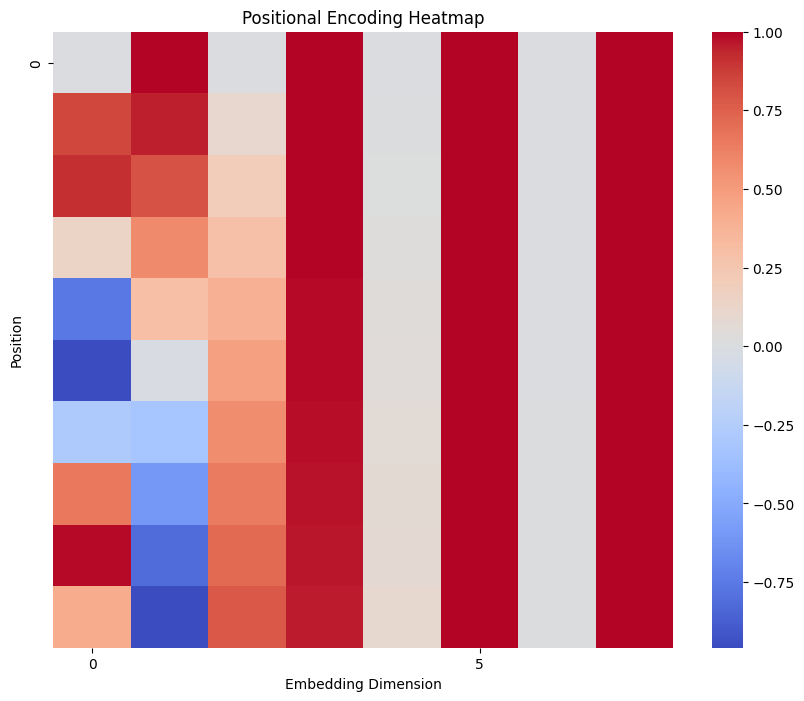

In [6]:
pe[:, 0::2] = term_sin
pe[:, 1::2] = term_cos

print(pe)
plot_positional_encoding(pe)

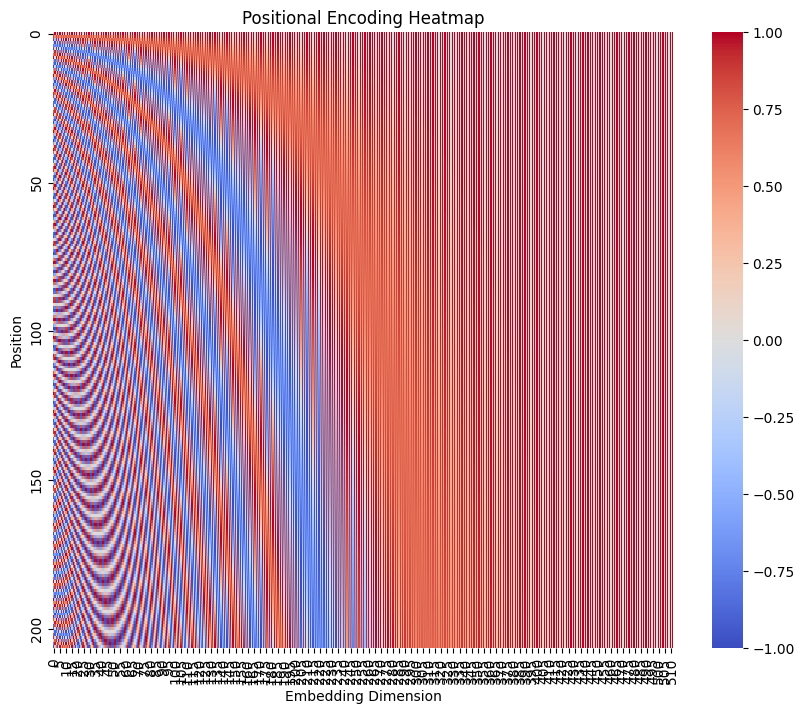

In [7]:
def position_encoding(max_len =5000, embedd_dim = 512):
    pe = np.zeros((max_len, embedd_dim), dtype= np.float32 )
    position = np.arange(0, max_len, dtype=np.float32).reshape(max_len,-1)
    even_postion =  np.tile(np.arange(0, embedd_dim, 2), (max_len, 1))
    odd_postion =  np.tile(np.arange(1, embedd_dim, 2), (max_len, 1))

    term_div_sin = np.sin(position / (np.power(10000,even_postion / embedd_dim)))
    term_div_cos = np.cos(position / (np.power(10000,odd_postion / embedd_dim)))

    pe[:, 0::2] =  term_div_sin
    pe[:, 1::2] =  term_div_cos

    return pe
plot_positional_encoding(position_encoding(207, 512))

### **Create Positional Embedding in Numpy**

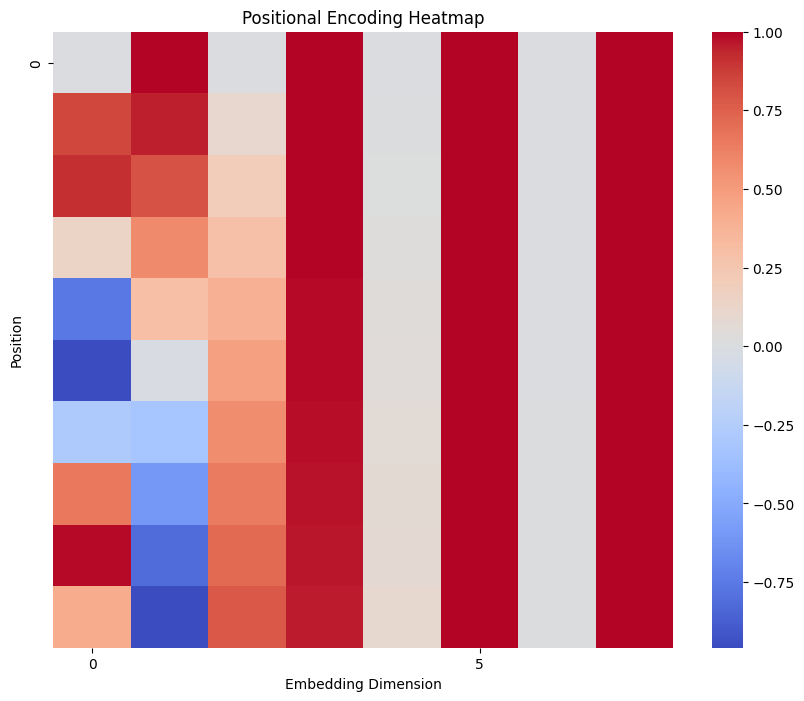

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn 

class PositionalEncoding(nn.Module):
    def __init__(self, embed_dim, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, embed_dim)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term_sin = torch.exp(torch.arange(0, embed_dim, 2).float() * (-torch.log(torch.tensor(10000.0)) / embed_dim))
        div_term_cos = torch.exp(torch.arange(1, embed_dim, 2).float() * (-torch.log(torch.tensor(10000.0)) / embed_dim))

        pe[:, 0::2] = torch.sin(position * div_term_sin)
        pe[:, 1::2] = torch.cos(position * div_term_cos)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return x

def plot_PE(pe_matrix, embed_dim):
    plt.figure(figsize=(10, 8))
    sns.heatmap(pe_matrix[:, :embed_dim], cmap='coolwarm', xticklabels=5, yticklabels=50)
    plt.xlabel('Embedding Dimension')
    plt.ylabel('Position')
    plt.title('Positional Encoding Heatmap')
    plt.savefig('pe_torch.png', dpi=300, bbox_inches='tight')

    plt.show()

embedd_dim = 10
max_len = 8
pos_enc = PositionalEncoding(embedd_dim, max_len)

pe_matrix = pos_enc.pe.squeeze(1)

plot_PE(pe,embedd_dim)

In [10]:
print(pe)

[[ 0.0000000e+00  1.0000000e+00  0.0000000e+00  1.0000000e+00
   0.0000000e+00  1.0000000e+00  0.0000000e+00  1.0000000e+00]
 [ 8.4147096e-01  9.5041525e-01  9.9833414e-02  9.9950004e-01
   9.9998331e-03  9.9999499e-01  9.9999981e-04  9.9999994e-01]
 [ 9.0929741e-01  8.0657840e-01  1.9866933e-01  9.9800068e-01
   1.9998666e-02  9.9997997e-01  1.9999987e-03  9.9999982e-01]
 [ 1.4112000e-01  5.8275360e-01  2.9552022e-01  9.9550337e-01
   2.9995501e-02  9.9995500e-01  2.9999956e-03  9.9999952e-01]
 [-7.5680250e-01  3.0113748e-01  3.8941833e-01  9.9201065e-01
   3.9989334e-02  9.9992001e-01  3.9999895e-03  9.9999923e-01]
 [-9.5892429e-01 -1.0342319e-02  4.7942555e-01  9.8752600e-01
   4.9979169e-02  9.9987501e-01  4.9999794e-03  9.9999875e-01]
 [-2.7941549e-01 -3.2079646e-01  5.6464249e-01  9.8205394e-01
   5.9964005e-02  9.9981999e-01  5.9999642e-03  9.9999821e-01]
 [ 6.5698659e-01 -5.9943742e-01  6.4421767e-01  9.7559988e-01
   6.9942847e-02  9.9975502e-01  6.9999429e-03  9.9999756e-01]
